In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('/kaggle/input/worldwide-travel-cities-ratings-and-climate/Worldwide Travel Cities Dataset (Ratings and Climate).csv')
df.head()

,id,city,country,region,short_description,latitude,longitude,avg_temp_monthly,ideal_durations,budget_level,culture,adventure,nature,beaches,nightlife,cuisine,wellness,urban,seclusion
0,c54acf38-3029-496b-8c7a-8343ad82785c,Milan,Italy,europe,"Chic streets lined with fashion boutiques, his...",45.464194,9.189635,"{""1"":{""avg"":3.7,""max"":7.8,""min"":0.4},""2"":{""avg...","[""Short trip"",""One week""]",Luxury,5,2,2,1,4,5,3,5,2
1,0bd12654-ed64-424e-a044-7bc574bcf078,Yasawa Islands,Fiji,oceania,"Crystal-clear waters, secluded beaches, and vi...",-17.290947,177.125786,"{""1"":{""avg"":28,""max"":30.8,""min"":25.8},""2"":{""av...","[""Long trip"",""One week""]",Luxury,2,4,5,5,2,3,4,1,5
2,73036cda-9134-46fc-a2c6-807782d59dfb,Whistler,Canada,north_america,Snow-capped peaks and lush forests create a se...,50.117190,-122.954302,"{""1"":{""avg"":-2.5,""max"":0.4,""min"":-5.5},""2"":{""a...","[""Short trip"",""Weekend"",""One week""]",Luxury,3,5,5,2,3,3,4,2,4
3,3872c9c0-6b6e-49e1-9743-f46bfe591b86,Guanajuato,Mexico,north_america,Winding cobblestone streets and colorful facad...,20.987700,-101.000000,"{""1"":{""avg"":15.5,""max"":22.8,""min"":8.7},""2"":{""a...","[""Weekend"",""One week"",""Short trip""]",Mid-range,5,3,3,1,3,4,3,4,2
4,e1ebc1b6-8798-422d-847a-22016faff3fd,Surabaya,Indonesia,asia,Bustling streets filled with the aroma of loca...,-7.245972,112.737827,"{""1"":{""avg"":28.1,""max"":32.5,""min"":25.5},""2"":{""...","[""Short trip"",""Weekend""]",Budget,4,3,3,2,3,4,3,4,2


In [3]:
df['avg_temp_monthly_parsed'] = df['avg_temp_monthly'].apply(json.loads)

In [4]:
for month in range(1, 13):
    month_str = str(month)
    df[f'temp_avg_month_{month}'] = df['avg_temp_monthly_parsed'].apply(lambda x: x[month_str]['avg'])

In [5]:
df['ideal_durations_parsed'] = df['ideal_durations'].apply(json.loads)

In [6]:
df_cleaned_preview = df[[
    'city', 'country', 'budget_level', 
    'ideal_durations_parsed'] + 
    [f'temp_avg_month_{m}' for m in range(1, 4)] 
].head()

In [7]:
df_cleaned_preview

,city,country,budget_level,ideal_durations_parsed,temp_avg_month_1,temp_avg_month_2,temp_avg_month_3
0,Milan,Italy,Luxury,"[Short trip, One week]",3.7,7.1,10.5
1,Yasawa Islands,Fiji,Luxury,"[Long trip, One week]",28.0,28.0,26.9
2,Whistler,Canada,Luxury,"[Short trip, Weekend, One week]",-2.5,-1.8,0.2
3,Guanajuato,Mexico,Mid-range,"[Weekend, One week, Short trip]",15.5,17.2,20.3
4,Surabaya,Indonesia,Budget,"[Short trip, Weekend]",28.1,27.8,28.3


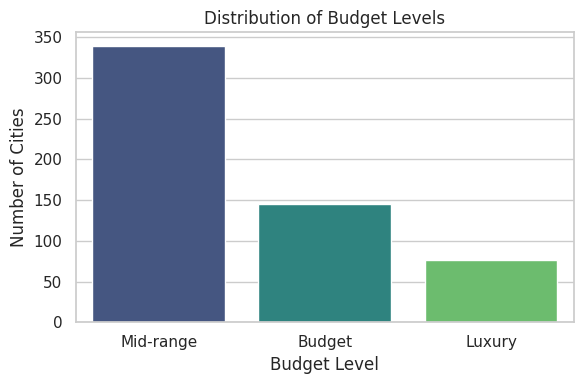

In [8]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='budget_level', order=df['budget_level'].value_counts().index, palette="viridis")
plt.title('Distribution of Budget Levels')
plt.xlabel('Budget Level')
plt.ylabel('Number of Cities')
plt.tight_layout()
plt.show()

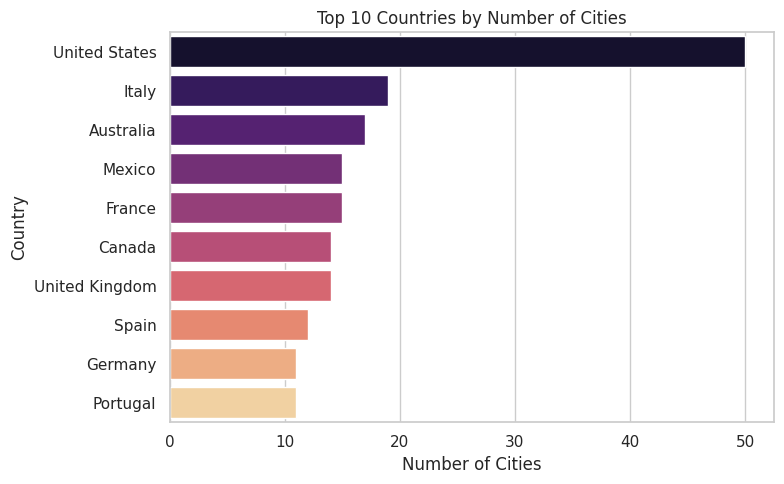

In [9]:
top_countries = df['country'].value_counts().nlargest(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="magma")
plt.title('Top 10 Countries by Number of Cities')
plt.xlabel('Number of Cities')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

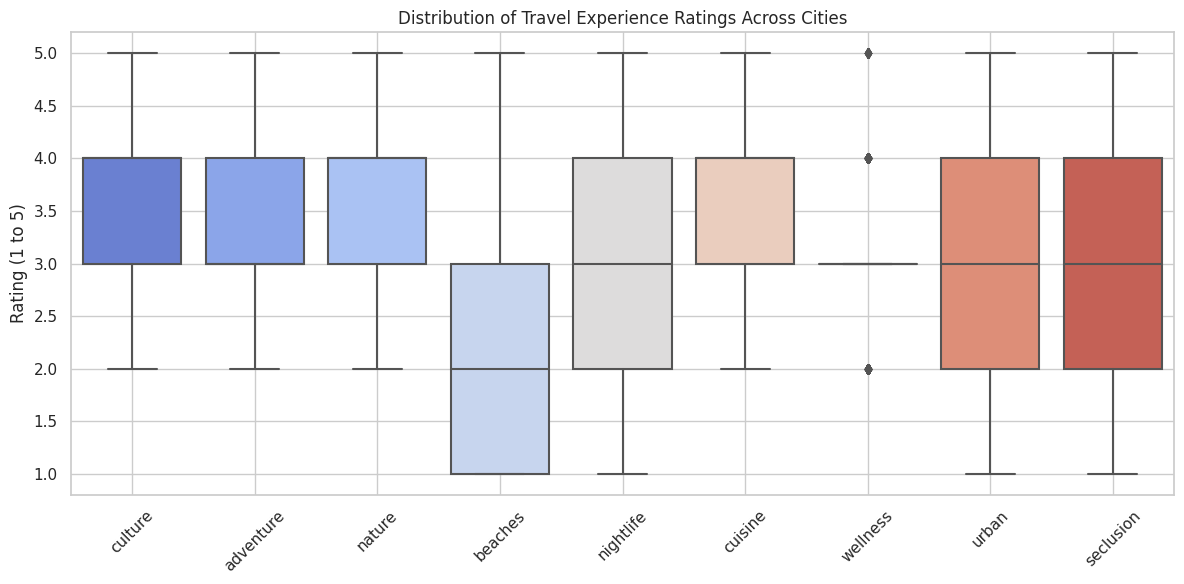

In [10]:
rating_cols = [
    'culture', 'adventure', 'nature', 'beaches',
    'nightlife', 'cuisine', 'wellness', 'urban', 'seclusion'
]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[rating_cols], palette="coolwarm")
plt.title('Distribution of Travel Experience Ratings Across Cities')
plt.ylabel('Rating (1 to 5)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


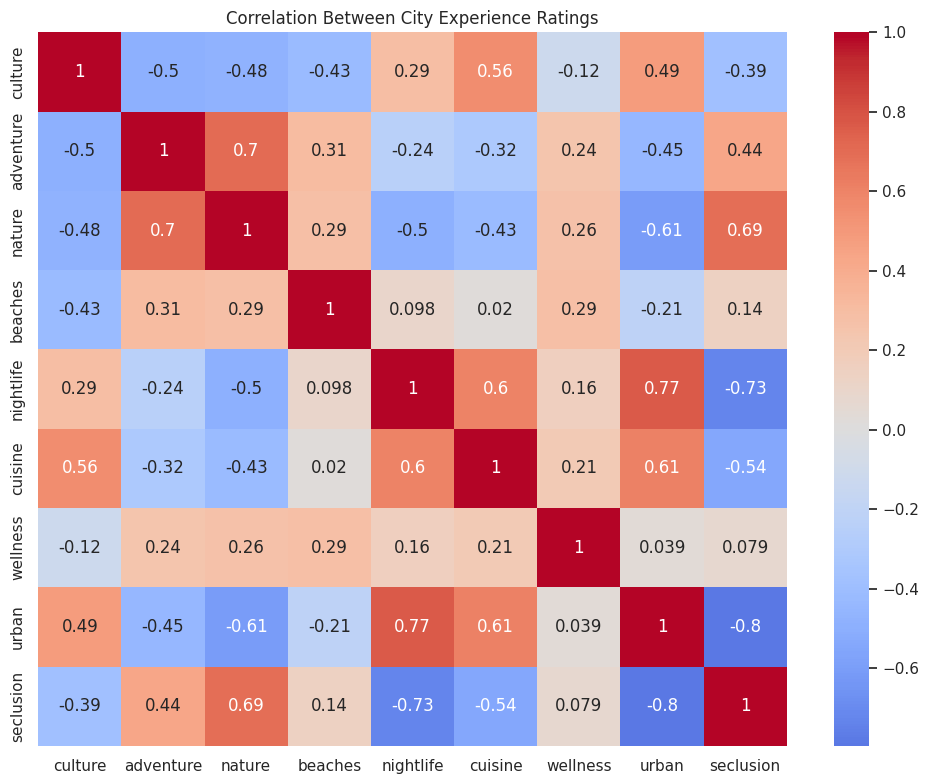

In [11]:
rating_cols = [
    'culture', 'adventure', 'nature', 'beaches',
    'nightlife', 'cuisine', 'wellness', 'urban', 'seclusion'
]

corr_matrix = df[rating_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between City Experience Ratings')
plt.tight_layout()
plt.show()

In [12]:
rating_cols = [
    'culture', 'adventure', 'nature', 'beaches',
    'nightlife', 'cuisine', 'wellness', 'urban', 'seclusion'
]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[rating_cols])

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

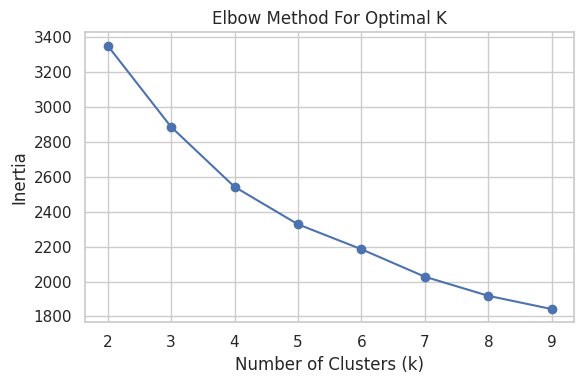

In [13]:
inertia = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


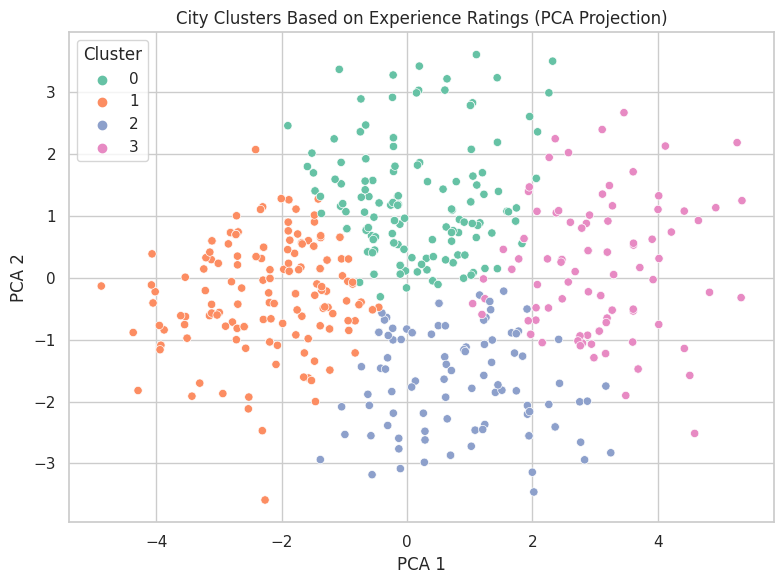

In [15]:
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(X_scaled)

df['pca_1'] = pca_coords[:, 0]
df['pca_2'] = pca_coords[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pca_1', y='pca_2', hue='cluster', palette='Set2')
plt.title('City Clusters Based on Experience Ratings (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

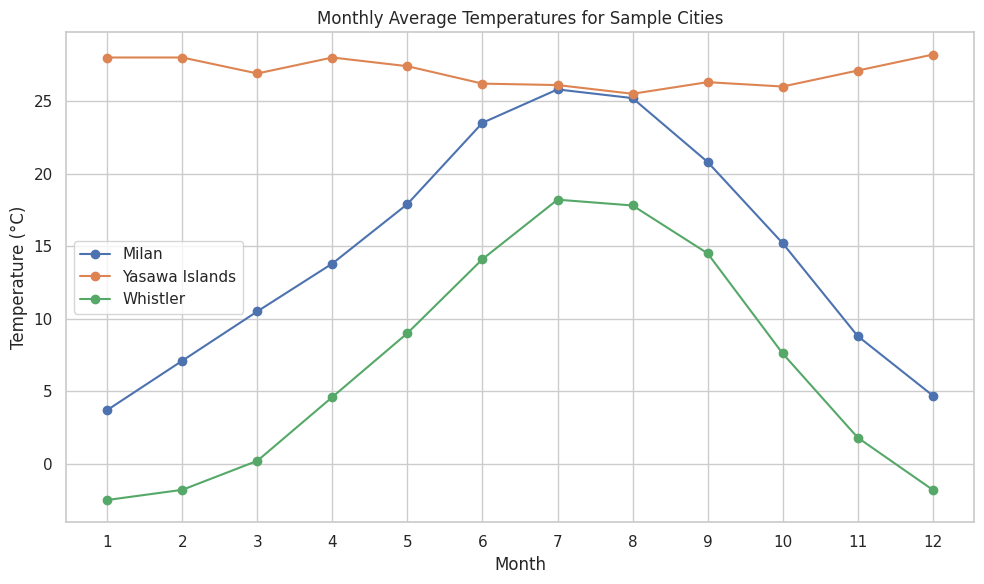

In [16]:
sample_cities = ['Milan', 'Yasawa Islands', 'Whistler']

plt.figure(figsize=(10, 6))

for city in sample_cities:
    city_data = df[df['city'] == city]
    temps = [city_data[f'temp_avg_month_{m}'].values[0] for m in range(1, 13)]
    plt.plot(range(1, 13), temps, marker='o', label=city)

plt.title('Monthly Average Temperatures for Sample Cities')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
df['avg_temp_year'] = df[[f'temp_avg_month_{m}' for m in range(1, 13)]].mean(axis=1)

hottest = df[['city', 'country', 'avg_temp_year']].sort_values(by='avg_temp_year', ascending=False).head()
coldest = df[['city', 'country', 'avg_temp_year']].sort_values(by='avg_temp_year', ascending=True).head()

In [18]:
hottest

,city,country,avg_temp_year
410,Dubai,United Arab Emirates,29.400000
507,Santa Marta,Colombia,29.358333
178,Bangkok,Thailand,29.258333
461,Abu Dhabi,United Arab Emirates,29.250000
33,Malé,Maldives,29.158333


In [19]:
coldest

,city,country,avg_temp_year
191,Svalbard,Norway,-4.100000
5,Nuuk,Greenland,-0.566667
331,Ulaanbaatar,Mongolia,0.041667
543,Yellowstone National Park,United States,0.308333
197,El Chaltén,Argentina,0.908333


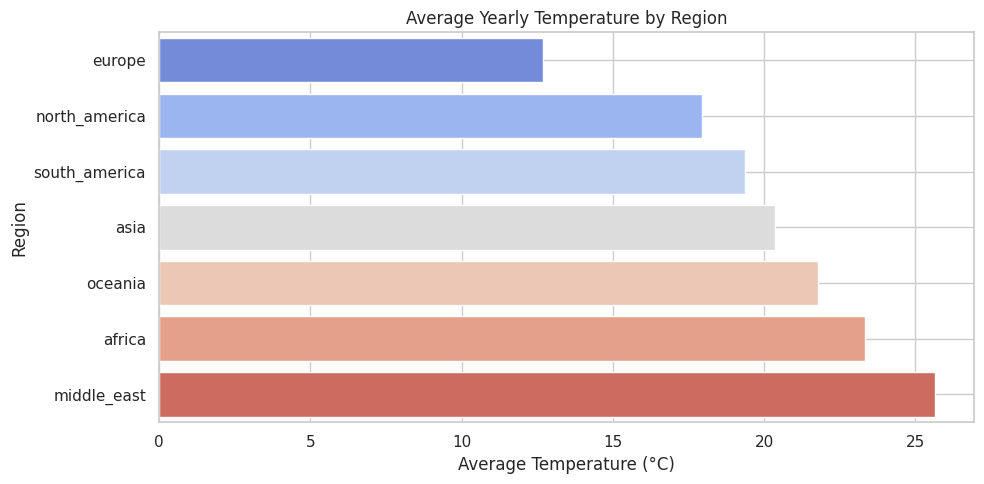

In [20]:
df['avg_temp_year'] = df[[f'temp_avg_month_{m}' for m in range(1, 13)]].mean(axis=1)

region_avg_temp = df.groupby('region')['avg_temp_year'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=region_avg_temp.values, y=region_avg_temp.index, palette="coolwarm")
plt.title('Average Yearly Temperature by Region')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Region')
plt.grid(True)
plt.tight_layout()
plt.show()